In [1]:
##load saved bm.keras and optimize it and then also train on test data and train data then upload final 













#default ml libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn as sk
#tf libraries
import tensorflow as tf
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
import itertools
import pandas as pd
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, r2_score
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns

2024-10-21 19:47:09.631035: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 19:47:09.634350: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-21 19:47:09.643749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-21 19:47:09.657793: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-21 19:47:09.661944: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-21 19:47:09.673549: I tensorflow/core/platform/cpu_feature_gu

In [2]:
# Load the test.csv file
loaddata = pd.read_csv('train.csv')
train = loaddata.copy()
print(train.head())

   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0              

In [3]:
# feature engineering
train["loantoincome"] = ((train["loan_amnt"] / train["person_income"])).astype(str).astype('category')
train["loan_percent_incometoincome"] = ((train["loan_percent_income"] / train["person_income"])).astype(str).astype('category')
train['person_age_to_person_income'] = (train['person_age'] / train['person_income']).astype(str).astype('category')
train['person_emp_length_to_person_age'] = (train['person_emp_length'] / train['person_age']).astype(str).astype('category')
train['loan_int_rate_to_loan_amnt'] = (train['loan_int_rate'] / train['loan_amnt']).astype(str).astype('category')

train['person_home_ownership'] = train['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3}).astype('category')
train['loan_intent'] = train['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5}).astype('category')
train['loan_grade'] = train['loan_grade'].replace({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}).astype('category')
train['cb_person_default_on_file'] = train['cb_person_default_on_file'].replace({'N': 0, 'Y': 1}).astype('category')
# train['person_emp_length'] = train['person_emp_length'].astype(str).astype('category')
# train['loan_int_rate'] = (train['loan_int_rate'] * 100).astype(str).astype('category')
# train['loan_percent_income'] = (train['loan_percent_income'] * 100).astype(str).astype('category')

# more feature engineering
train["person_home_ownership_income"] = pd.Series(pd.factorize((train["person_home_ownership"].astype(str) + train["person_income"].astype(str)).to_numpy())[0]).astype('category')



/tmp/ipykernel_7414/2929891026.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['person_home_ownership'] = train['person_home_ownership'].replace({'RENT': 0, 'MORTGAGE': 1, 'OWN': 2, 'OTHER': 3}).astype('category')
/tmp/ipykernel_7414/2929891026.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['loan_intent'] = train['loan_intent'].replace({'EDUCATION': 0, 'MEDICAL': 1, 'PERSONAL': 2, 'VENTURE': 3, 'DEBTCONSOLIDATION': 4, 'HOMEIMPROVEMENT': 5}).astype('category')
/tmp/ipykernel_7414/2929891026.py:10: FutureWarning

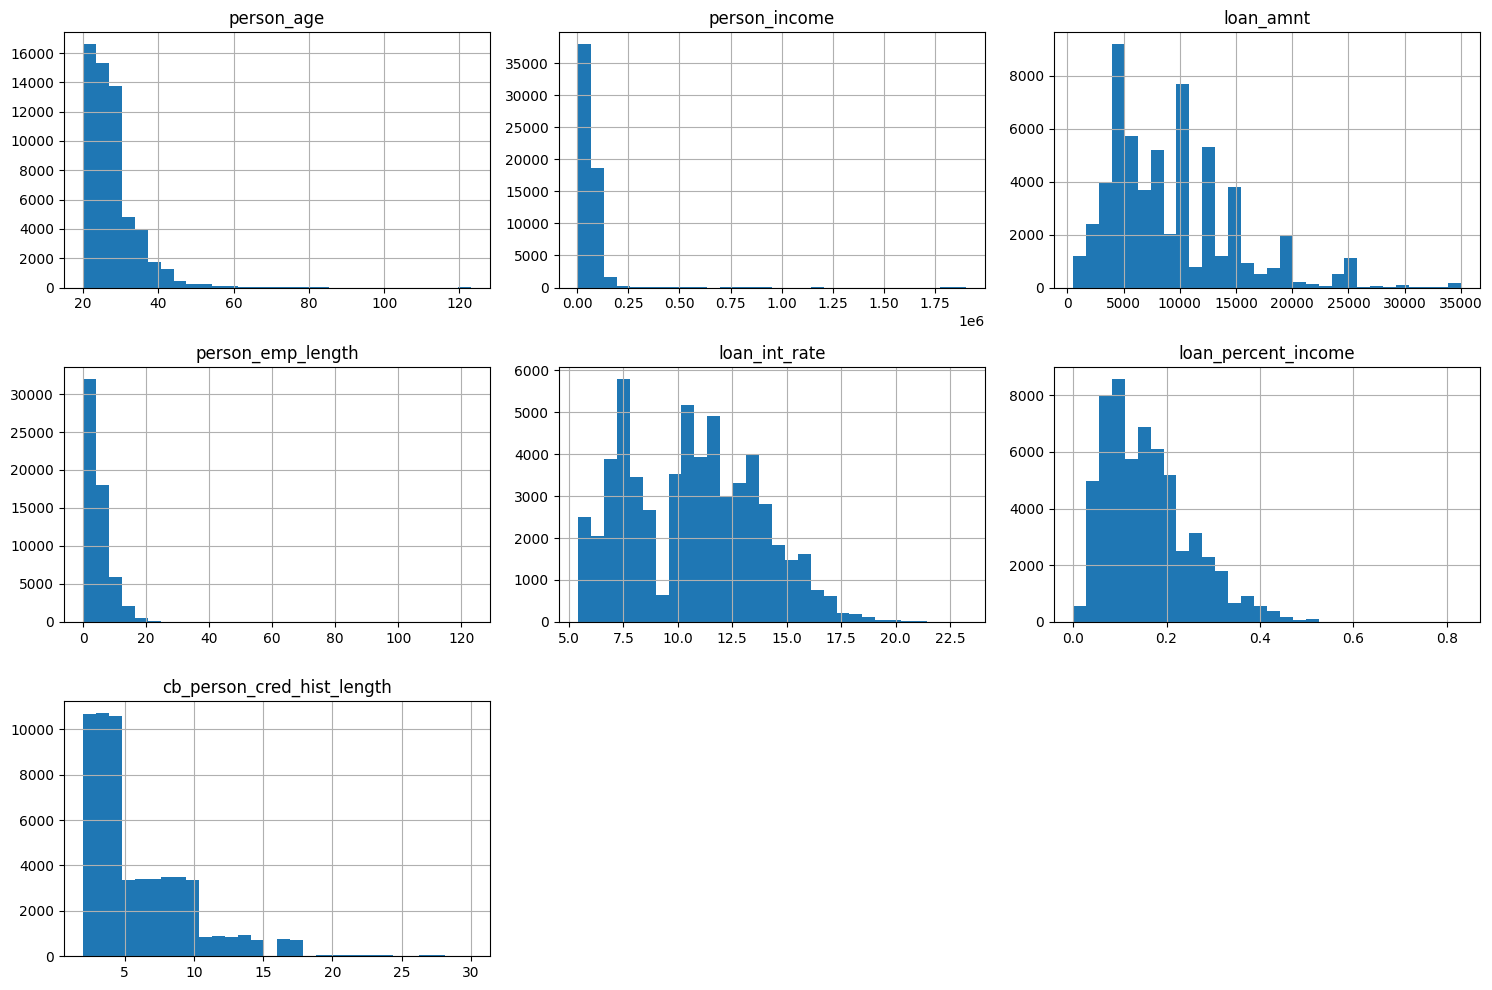

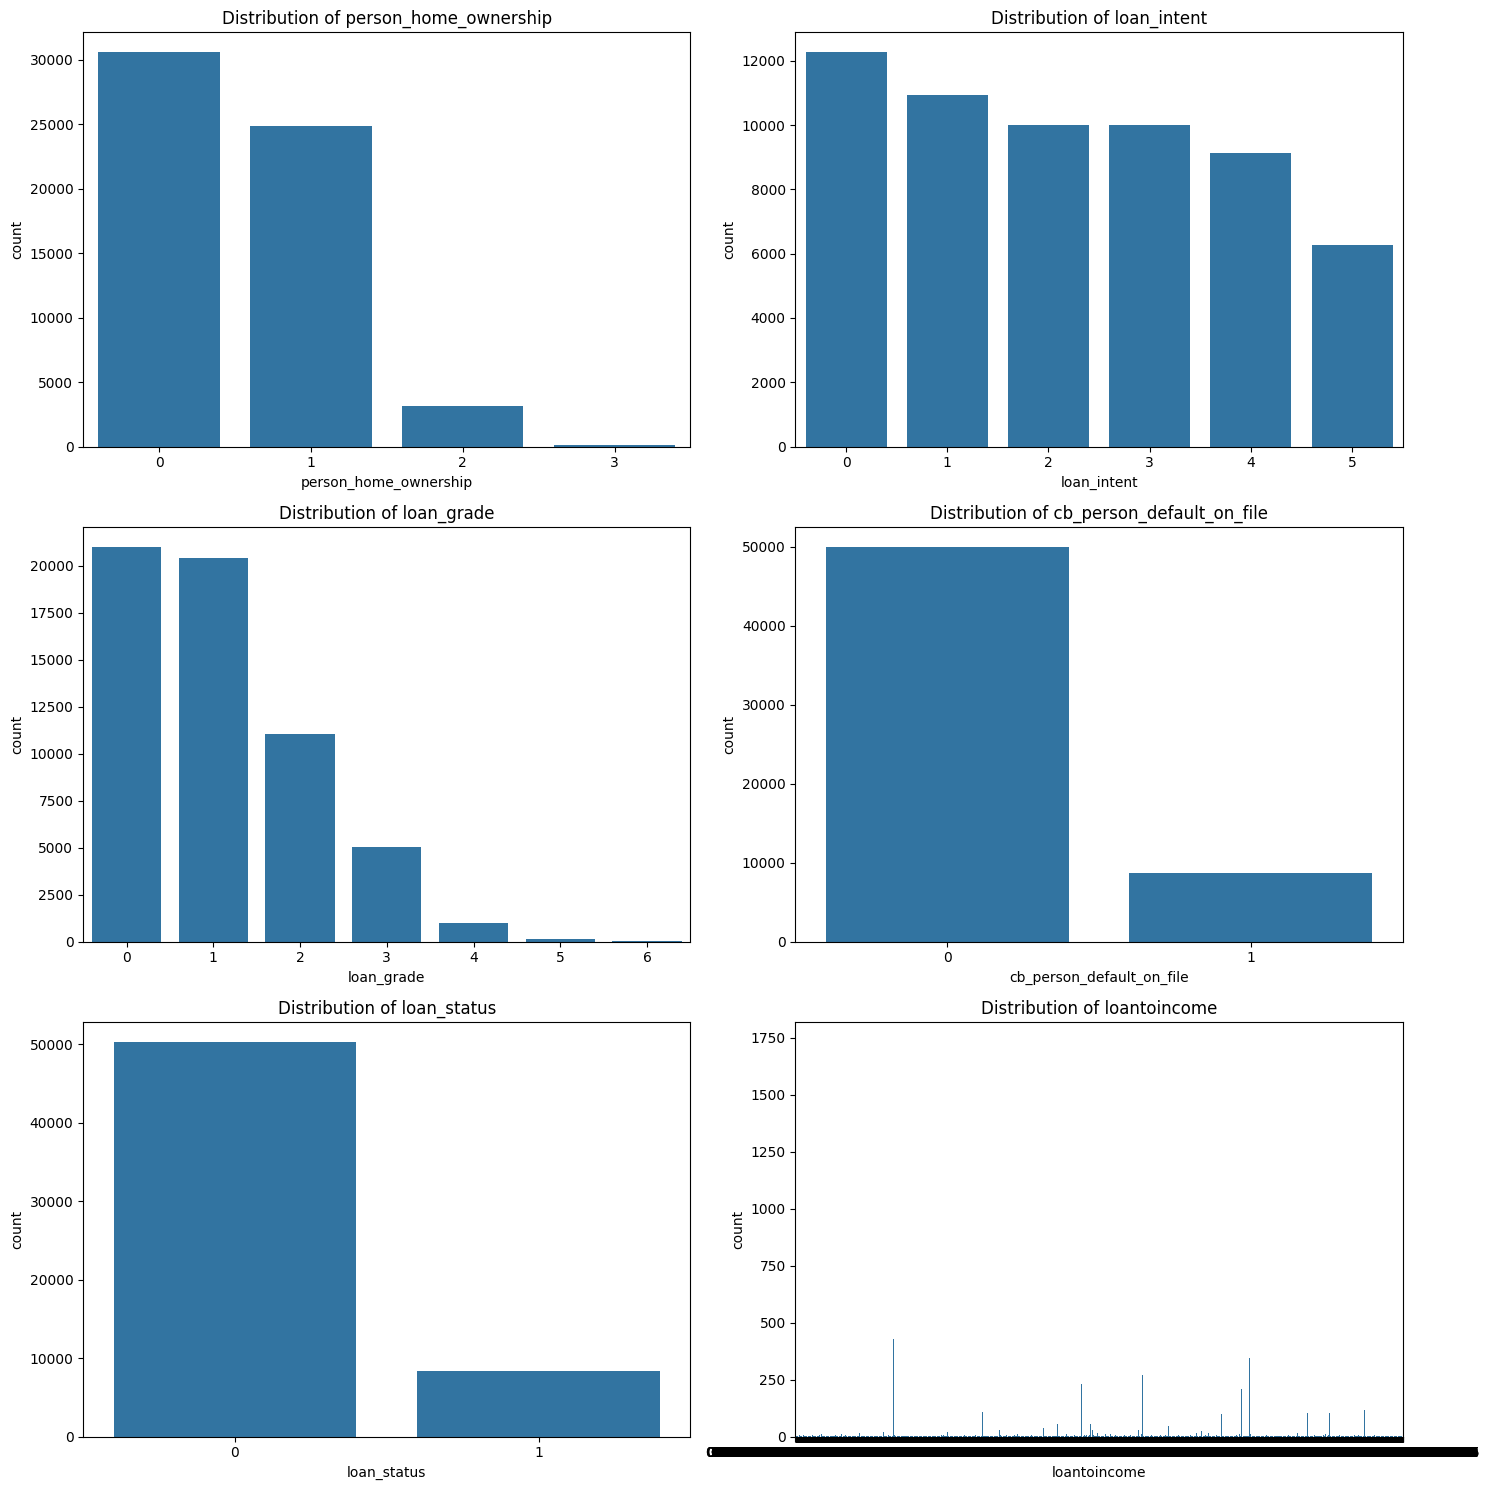

In [4]:


# Plot histograms for numerical columns
numerical_columns = ['person_age', 'person_income', 'loan_amnt',"person_emp_length" ,'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
train[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Plot count plots for categorical columns
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'loan_status']
categorical_features = [
    "loantoincome",
    "loan_percent_incometoincome",
    "person_age_to_person_income",
    "person_emp_length_to_person_age",
    "loan_int_rate_to_loan_amnt",
    # "person_emp_length",
    # "loan_int_rate",
    # "loan_percent_income",
    "person_home_ownership_income"
]
for col in categorical_features:
    categorical_columns.append(col)
fig, axes = plt.subplots(3, 2, figsize=(15, 15))  # Adjusted to 3x2 grid
for ax, col in zip(axes.flatten(), categorical_columns):
    sns.countplot(data=train, x=col, ax=ax)
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

features = numerical_columns + categorical_columns
# Define the preprocessing for numerical and categorical features




In [5]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

target = ['loan_status']  # Replace with the actual target column name

# Preprocess the data
X = train[features]
y = train[target]
ids = train['id']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, ids, test_size=0.2, random_state=42)

# Define the preprocessing for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Preprocess the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Function to add noise
def add_noise(data, noise_level=0.01):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# Add noise to the numerical features
X_train_noisy = X_train.copy()
X_test_noisy = X_test.copy()
X_train_noisy[:, :len(numerical_features)] = add_noise(X_train[:, :len(numerical_features)])
X_test_noisy[:, :len(numerical_features)] = add_noise(X_test[:, :len(numerical_features)])
X_train_less_noise = X_train.copy()
X_test_less_noise = X_test.copy()
X_train_less_noise[:, :len(numerical_features)] = add_noise(X_train[:, :len(numerical_features)],noise_level=0.001)
X_test_less_noise[:, :len(numerical_features)] = add_noise(X_test[:, :len(numerical_features)],noise_level=0.001)

# Concatenate the original data with the noisy data vertically
X_train_combined = np.vstack((X_train, X_train_noisy, X_train_less_noise))
X_test_combined = np.vstack((X_test, X_test_noisy, X_test_less_noise))

# Concatenate the target variable as well
y_train_combined = np.vstack((y_train, y_train, y_train))
y_test_combined = np.vstack((y_test, y_test,y_test))

# Concatenate the ids as well
ids_train_combined = np.hstack((ids_train, ids_train, ids_train))
ids_test_combined = np.hstack((ids_test, ids_test, ids_test))

# Update the original variables
X_train = X_train_combined
X_test = X_test_combined
y_train = y_train_combined
y_test = y_test_combined
ids_train = ids_train_combined
ids_test = ids_test_combined
xult , yult  , idsult= np.vstack((X_train, X_test)), np.vstack((y_train, y_test)) , np.hstack((ids_train, ids_test))
print(X_train.shape)  # Should output (46916 + 46916, 26)
print(X_test.shape)   # Should output (11729 + 11729, 26)
print(y_train.shape)  # Should output (46916 + 46916, 1)
print(y_test.shape)   # Should output (11729 + 11729, 1)
print(ids_train.shape)  # Should output (46916 + 46916,)
print(ids_test.shape)   # Should output (11729 + 11729,)

NameError: name 'numerical' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2

# Reshape the data
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))

# Define the L2 regularizers
k = 1/2
kernel_regularizer = l2(0.001*k)
bias_regularizer = l2(0.0001*k)

# Define the CNN model with different regularization strengths for kernel and bias
model = Sequential([
    Conv2D(64, (3, 1), activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1),
           kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer, padding='same'),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 1), padding='same'),  # First max pooling layer
    Dropout(0.5),  # First dropout layer
    Conv2D(128, (3, 1), activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer, padding='same'),  # Second convolutional layer
    MaxPooling2D(pool_size=(2, 1), padding='same'),  # Second max pooling layer
    Dropout(0.5),  # Second dropout layer
    # Conv2D(256, (3, 1), activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer, padding='same'),  # Third convolutional layer
    # MaxPooling2D(pool_size=(2, 1), padding='same'),  # Third max pooling layer
    # Dropout(0.5),  # Third dropout layer
    Conv2D(256, (3, 1), activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer, padding='same'),  # Fourth convolutional layer
    MaxPooling2D(pool_size=(2, 1), padding='same'),  # Fourth max pooling layer
    Dropout(0.5),  # Fourth dropout layer
    Conv2D(512, (3, 1), activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer, padding='same'),  # Fifth convolutional layer
    MaxPooling2D(pool_size=(2, 1), padding='same'),  # Fifth max pooling layer
    Dropout(0.25),  # Fifth dropout layer
    Flatten(),  # Flatten the data for the dense layers
    Dense(512, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer),  # First dense layer
    Dropout(0.5),  # Sixth dropout layer
    Dense(256, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer),  # Second dense layer
    Dropout(0.5),  # Seventh dropout layer
    Dense(128, activation='relu', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer),  # Third dense layer
    Dropout(0.5),  # Eighth dropout layer
    Dense(1, activation='sigmoid', kernel_regularizer=kernel_regularizer, bias_regularizer=bias_regularizer)  # Output layer
])

# Compile the model
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[ AUC()])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=1, batch_size=32, verbose=1, validation_data=(X_test_reshaped, y_test))
model.fit(X_test_reshaped, y_test, epochs=1, batch_size=16, verbose=1, validation_data=(X_train_reshaped, y_train))
model.fit(X_train_reshaped, y_train, epochs=1, batch_size=16, verbose=1, validation_data=(X_test_reshaped, y_test))
model.fit(X_test_reshaped, y_test, epochs=1, batch_size=16, verbose=1, validation_data=(X_train_reshaped, y_train))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test_reshaped)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
# Print the results
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

# Load the test data
test = pd.read_csv('test.csv')

# Define the features (assuming features is already defined)
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
            'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Reshape the test data to match the input shape used during training
X_reshaped = X.reshape((X.shape[0], X.shape[1], 1, 1))

# Predict the values using the model
y_pred = model.predict(X_reshaped)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)

# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'loan_status': y_pred.flatten()})

# Print the DataFrame
print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

# Print the counts
print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

# Plot a pie chart showing the percentages
labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

# Save the predictions to CSV with (id, prediction)
predictions_df.to_csv('fdd.csv', index=False)

C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4399/4399 ━━━━━━━━━━━━━━━━━━━━ 96s 21ms/step - auc_5: 0.8271 - loss: 0.4936 - val_auc_5: 0.9135 - val_loss: 0.2551
2200/2200 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - auc_5: 0.8771 - loss: 0.3013 - val_auc_5: 0.9086 - val_loss: 0.2770
8797/8797 ━━━━━━━━━━━━━━━━━━━━ 156s 18ms/step - auc_5: 0.8756 - loss: 0.3069 - val_auc_5: 0.9034 - val_loss: 0.2852
1933/2200 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - auc_5: 0.8734 - loss: 0.3155

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

class AutoencoderModel:
    def __init__(self, input_dim, encoding_dim=1024):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.autoencoder = self.build_model()

    def build_model(self):
        # Define the regularizer
        regularizer = tf.keras.regularizers.l2(0.000001)
    
        # Encoder
        input_layer = Input(shape=(self.input_dim,))
        encoded = Dense(self.encoding_dim, activation='relu')(input_layer)
        encoded = Dense(self.encoding_dim // 2, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)
        encoded = Dense(self.encoding_dim // 4, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)
        encoded = Dense(self.encoding_dim // 8, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)
        encoded = Dense(self.encoding_dim // 16, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)
        encoded = Dense(self.encoding_dim // 32, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)
    
        # Decoder
        decoded = Dense(self.encoding_dim // 32, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)
        decoded = Dense(self.encoding_dim // 16, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)
        decoded = Dense(self.encoding_dim // 8, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)
        decoded = Dense(self.encoding_dim // 4, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(decoded)
        decoded = Dense(self.encoding_dim // 2, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(decoded)
        decoded = Dense(1, activation='sigmoid')(decoded)
    
        # Autoencoder
        autoencoder = Model(input_layer, decoded)
    
        # Compile the model with Binary Crossentropy loss
        autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
        return autoencoder

    def train(self, X_train, y_train, epochs=40, batch_size=32, validation_split=0.3):
        self.autoencoder.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    def predict(self, X_test):
        return self.autoencoder.predict(X_test)

    def summary(self):
        self.autoencoder.summary()# Load the train.csv file


# Load the train.csv file

# Assuming X_train, y_train, X_test, y_test, and ids_test are defined elsewhere in the code
# Initialize and train the autoencoder model
input_dim = X_train.shape[1]
autoencoder_model = AutoencoderModel(input_dim)
autoencoder_model.summary()
# autoencoder_model.train(xult, yult)
autoencoder_model.train(X_train, y_train)

# Predict the values using the autoencoder
y_pred = autoencoder_model.predict(X_test)

# Apply threshold of 0.5 to get binary predictions
y_pred_binary = (y_pred > 0.5).astype(int).flatten()
if len(ids_test) == len(y_pred_binary):
    # Combine IDs and predictions into a DataFrame
    predictions_df = pd.DataFrame({'id': ids_test, 'prediction': y_pred_binary})

    # Print the DataFrame
    # print(predictions_df)
    # autoencoder_model.train(X_test, y_test)
    # Count the number of predictions greater than 0.5 and less than or equal to 0.5
    count_greater_than_0_5 = (y_pred_binary > 0.5).sum()
    count_less_than_or_equal_0_5 = (y_pred_binary <= 0.5).sum()

    # Print the counts
    # print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
    # print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

    # Plot a pie chart showing the percentages
    labels = ['0', '1']
    sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # explode the first slice

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Predictions Distribution')
    plt.show()

    # Save the predictions to CSV with (id, prediction)
    predictions_df.to_csv('autobig.csv', index=False)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred_binary)
    print(f'R² score: {r2}')

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_binary)
    print(f'ROC AUC score: {roc_auc}')

    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    print('Confusion Matrix:')
    print(cm//2)
else:
    print("Error: Lengths of ids_test and y_pred_binary do not match." + str(len(ids_test)) + " " + str(len(y_pred_binary)))
autoencoder_model.train(X_test, y_test)

# Load the test.csv file
test = pd.read_csv('test.csv')
print(test.head())

# Define the features (assuming features is already defined)
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
            'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Predict the values using autoencoder_model
y_pred = autoencoder_model.predict(X)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)
print(y_pred.shape, y_pred.flatten().shape)

# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'prediction': y_pred.flatten()})

# Print the DataFrame
print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

# Print the counts
print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

# Plot a pie chart showing the percentages
labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

# Save the predictions to CSV with (id, prediction)
predictions_df.to_csv('autobig.csv', index=False)

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 1024)           │        27,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 128)            │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896,353 (3.42 MB)

 Trainable params: 896,353 (3.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - loss: 0.2239 - val_loss: 0.1838
Epoch 2/40
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.1882 - val_loss: 0.1776
Epoch 3/40
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.1824 - val_loss: 0.1761
Epoch 4/40
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.1707 - val_loss: 0.1911
Epoch 5/40
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 0.1716 - val_loss: 0.1735
Epoch 6/40
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 0.1678 - val_loss: 0.1724
Epoch 7/40
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 33s 11ms/step - loss: 0.1675 - val_loss: 0.1635
Epoch 8/40
3079/3079 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.1635 - val_loss: 0.1639
Epoch 9/40
 565/3079 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.1672

KeyboardInterrupt: 

Epoch 1/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9153 - loss: 0.2410 - val_accuracy: 0.9433 - val_loss: 0.1788
Epoch 2/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9436 - loss: 0.1824 - val_accuracy: 0.9464 - val_loss: 0.1745
Epoch 3/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9469 - loss: 0.1754 - val_accuracy: 0.9465 - val_loss: 0.1752
Epoch 4/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9469 - loss: 0.1732 - val_accuracy: 0.9474 - val_loss: 0.1728
Epoch 5/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9479 - loss: 0.1718 - val_accuracy: 0.9461 - val_loss: 0.1742
Epoch 6/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9479 - loss: 0.1705 - val_accuracy: 0.9492 - val_loss: 0.1716
Epoch 7/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9489 - loss: 0.1682 - val_accuracy: 0.9490 - val_loss: 0.1765
Epoch 8/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9499 - loss: 0.1672 - 

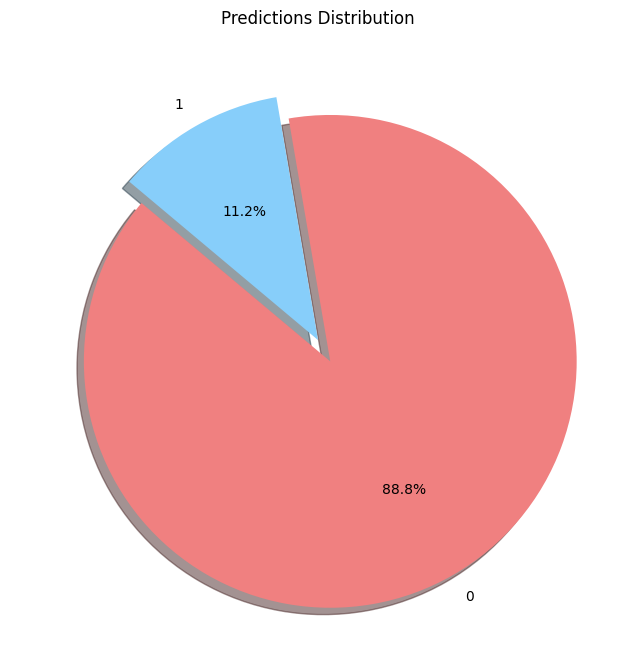

R² score: 0.5566975353402259
ROC AUC score: 0.8471096225324452
Confusion Matrix:
[[19878   296]
 [  956  2328]]
Epoch 1/25
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9455 - loss: 0.1829 - val_accuracy: 0.9511 - val_loss: 0.1598
Epoch 2/25
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9525 - loss: 0.1571 - val_accuracy: 0.9511 - val_loss: 0.1653
Epoch 3/25
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9514 - loss: 0.1553 - val_accuracy: 0.9493 - val_loss: 0.1691
Epoch 4/25
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9567 - loss: 0.1404 - val_accuracy: 0.9485 - val_loss: 0.1733
Epoch 5/25
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9561 - loss: 0.1415 - val_accuracy: 0.9475 - val_loss: 0.1778
Epoch 6/25
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9583 - loss: 0.1361 - val_accuracy: 0.9472 - val_loss: 0.1806
Epoch 7/25
734/734 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9602 - loss: 0.1304 - val_accuracy: 0.9455 - val_loss:

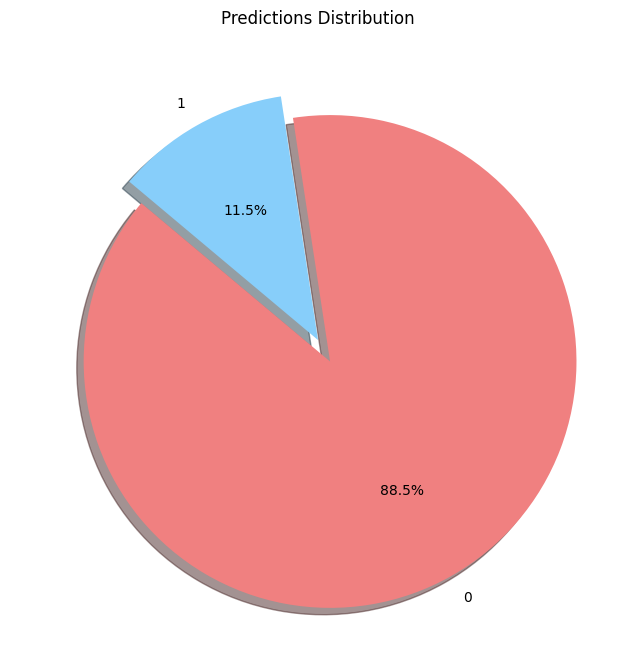

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Load the train.csv file

# Assuming X_train, y_train, X_test, y_test, and ids_test are defined elsewhere in the code


# Split the data into training and testing sets

# Fit the preprocessor on the training data

# Load the pre-trained model
#make a sequential model
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import pandas as pd

# Define the regularizer
regularizer = tf.keras.regularizers.l2(0.000001)

# Encoder
input_layer = Input(shape=(X_train.shape[1],))
encoded = Dense(64, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(input_layer)
encoded = Dense(32, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)
encoded = Dense(16, activation='relu', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)

# Decoder (output layer for binary classification)
decoded = Dense(1, activation='sigmoid', kernel_regularizer=regularizer, bias_regularizer=regularizer)(encoded)

# Autoencoder model
model = Model(input_layer, decoded)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, shuffle=True, validation_data=(X_test, y_test))

# Predict the values using the model
y_pred = model.predict(X_test)

# Apply threshold of 0.5 to get binary predictions
y_pred_binary = (y_pred > 0.5).astype(int).flatten()
# Ensure the lengths match
if len(y_test) == len(y_pred_binary):
    # Combine IDs and predictions into a DataFrame
    y_test_flat = y_test.ravel()
    y_pred_binary_flat = y_pred_binary.ravel()

    # Create the DataFrame
    predictions_df = pd.DataFrame({'id': y_test_flat, 'prediction': y_pred_binary_flat})
    # Count the number of predictions greater than 0.5 and less than or equal to 0.5
    count_greater_than_0_5 = (y_pred_binary > 0.5).sum()
    count_less_than_or_equal_0_5 = (y_pred_binary <= 0.5).sum()

    # Print the counts
    # print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
    # print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

    # Plot a pie chart showing the percentages
    labels = ['0', '1']
    sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # explode the first slice

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Predictions Distribution')
    plt.show()

    # Save the predictions to CSV with (id, prediction)
    predictions_df.to_csv('bmb.csv', index=False)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred_binary)
    print(f'R² score: {r2}')

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_binary)
    print(f'ROC AUC score: {roc_auc}')

    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    print('Confusion Matrix:')
    print(cm)
else:
    print("Error: Lengths of y_test and y_pred_binary do not match.")
model.fit(X_test, y_test, epochs=25, batch_size=32, shuffle=True, validation_data=(X_train, y_train))
# Load the test.csv file
test = pd.read_csv('test.csv')
print(test.head())

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Predict the values using the model
y_pred = model.predict(X)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)
# print(y_pred.shape, y_pred.flatten().shape)

# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'prediction': y_pred.flatten()})

# Print the DataFrame
# print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

# Print the counts
print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

# Plot a pie chart showing the percentages
labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

# Save the predictions to CSV with (id, prediction)
predictions_df.to_csv('bmb.csv', index=False)

   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0              

Model: "functional_112"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_80 (InputLayer)     │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_484 (Dense)               │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_485 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,793 (7.00 KB)

 Trainable params: 1,793 (7.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - loss: 0.2731 - val_loss: 0.1963
Epoch 2/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.2000 - val_loss: 0.1877
Epoch 3/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1879 - val_loss: 0.1831
Epoch 4/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1848 - val_loss: 0.1815
Epoch 5/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1841 - val_loss: 0.1794
Epoch 6/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1810 - val_loss: 0.1785
Epoch 7/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1769 - val_loss: 0.1765
Epoch 8/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1797 - val_loss: 0.1764
Epoch 9/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1769 - val_loss: 0.1755
Epoch 10/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1776 - val_loss: 0.1771
Epoch 11/30
2053/2053 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1731 - val_loss: 0.1747
Epoch 12/30
2053/2053 ━━━━━━━━

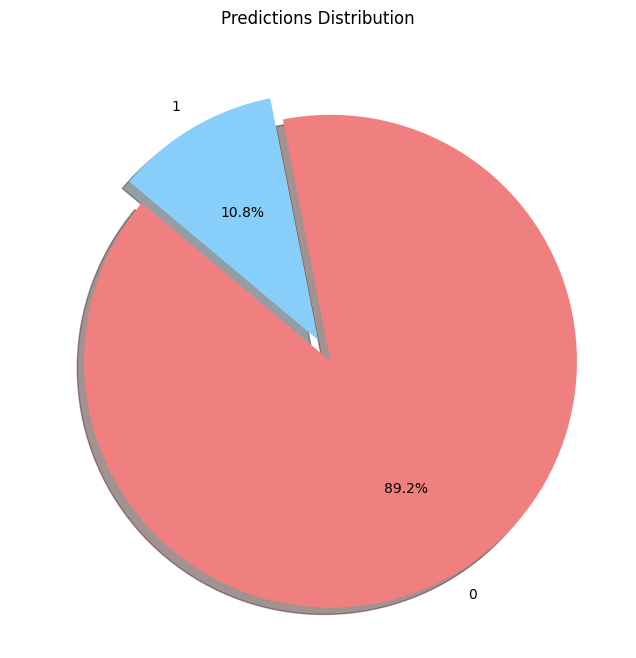

R² score: 0.5616545916543128
ROC AUC score: 0.8423578448496859
Confusion Matrix:
[[19932   242]
 [  996  2288]]
Epoch 1/30
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1472 - val_loss: 0.1551
Epoch 2/30
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1485 - val_loss: 0.1545
Epoch 3/30
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1424 - val_loss: 0.1546
Epoch 4/30
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1540 - val_loss: 0.1540
Epoch 5/30
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1499 - val_loss: 0.1537
Epoch 6/30
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1452 - val_loss: 0.1517
Epoch 7/30
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1502 - val_loss: 0.1527
Epoch 8/30
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1490 - val_loss: 0.1523
Epoch 9/30
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1496 - val_loss: 0.1526
Epoch 10/30
514/514 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1490 - val_loss: 0.1523
Epoch 11/30
514/514 ━━━━━━━

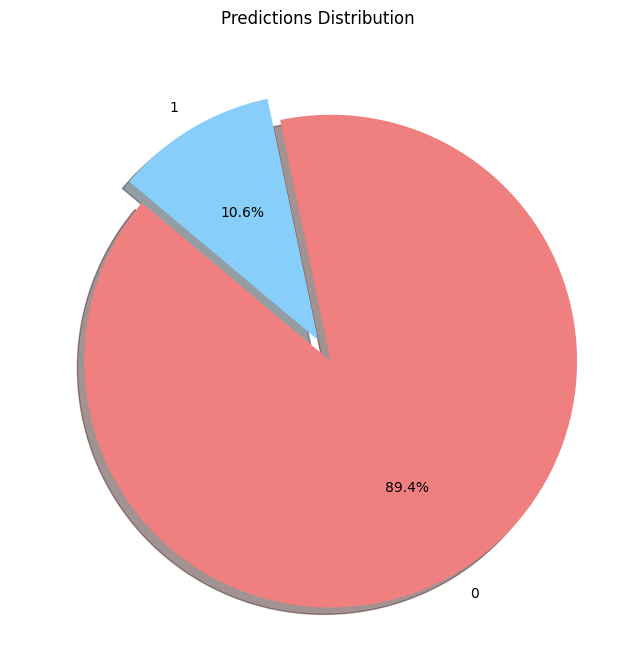

In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

class AutoencoderModel:
    def __init__(self, input_dim, encoding_dim=64):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.autoencoder = self.build_model()

    def build_model(self):
        # Encoder
        input_layer = Input(shape=(self.input_dim,))
        encoded = Dense(self.encoding_dim, activation='relu')(input_layer)

        # Decoder
        decoded = Dense(1, activation='sigmoid')(encoded)

        # Autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the model with Binary Crossentropy loss
        autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

        return autoencoder

    def train(self, X_train, y_train, epochs=30, batch_size=32, validation_split=0.3):
        self.autoencoder.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    def predict(self, X_test):
        return self.autoencoder.predict(X_test)

    def summary(self):
        self.autoencoder.summary()

# Load the train.csv file
train = pd.read_csv('train.csv')
print(train.head())

# Assuming X_train, y_train, X_test, y_test, and ids_test are defined elsewhere in the code
# Initialize and train the autoencoder model
input_dim = X_train.shape[1]
autoencoder_model = AutoencoderModel(input_dim)
autoencoder_model.summary()
autoencoder_model.train(X_train, y_train)

# Predict the values using the autoencoder
y_pred = autoencoder_model.predict(X_test)

# Apply threshold of 0.5 to get binary predictions
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# Check the lengths of ids_test and y_pred_binary
print(f'Length of ids_test: {len(ids_test)}')
print(f'Length of y_pred_binary: {len(y_pred_binary)}')

# Ensure the lengths match
if len(ids_test) == len(y_pred_binary):
    # Combine IDs and predictions into a DataFrame
    predictions_df = pd.DataFrame({'id': ids_test, 'prediction': y_pred_binary})

    # Print the DataFrame
    # print(predictions_df)
    autoencoder_model.train(X_test, y_test)
    # Count the number of predictions greater than 0.5 and less than or equal to 0.5
    count_greater_than_0_5 = (y_pred_binary > 0.5).sum()
    count_less_than_or_equal_0_5 = (y_pred_binary <= 0.5).sum()

    # Print the counts
    # print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
    # print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

    # Plot a pie chart showing the percentages
    labels = ['0', '1']
    sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # explode the first slice

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Predictions Distribution')
    plt.show()

    # Save the predictions to CSV with (id, prediction)
    predictions_df.to_csv('automid.csv', index=False)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred_binary)
    print(f'R² score: {r2}')

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_binary)
    print(f'ROC AUC score: {roc_auc}')

    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    print('Confusion Matrix:')
    print(cm)
else:
    print("Error: Lengths of ids_test and y_pred_binary do not match.")
autoencoder_model.train(X_test, y_test)

# Load the test.csv file
test = pd.read_csv('test.csv')
print(test.head())

# Define the features (assuming features is already defined)
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
            'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Predict the values using autoencoder_model
y_pred = autoencoder_model.predict(X)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)
print(y_pred.shape, y_pred.flatten().shape)

# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'prediction': y_pred.flatten()})

# Print the DataFrame
print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

# Print the counts
print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

# Plot a pie chart showing the percentages
labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

# Save the predictions to CSV with (id, prediction)
predictions_df.to_csv('automid.csv', index=False)

   id  person_age  person_income person_home_ownership  person_emp_length  \
0   0          37          35000                  RENT                0.0   
1   1          22          56000                   OWN                6.0   
2   2          29          28800                   OWN                8.0   
3   3          30          70000                  RENT               14.0   
4   4          22          60000                  RENT                2.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_percent_income  \
0   EDUCATION          B       6000          11.49                 0.17   
1     MEDICAL          C       4000          13.35                 0.07   
2    PERSONAL          A       6000           8.90                 0.21   
3     VENTURE          B      12000          11.11                 0.17   
4     MEDICAL          A       6000           6.92                 0.10   

  cb_person_default_on_file  cb_person_cred_hist_length  loan_status  
0              

Model: "functional_113"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_81 (InputLayer)     │ (None, 26)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_486 (Dense)               │ (None, 256)            │         6,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_487 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_488 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_489 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_491 (Dense)               │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_492 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_493 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,705 (237.13 KB)

 Trainable params: 60,705 (237.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.2304 - val_loss: 0.1943
Epoch 2/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1818 - val_loss: 0.1765
Epoch 3/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1766 - val_loss: 0.1764
Epoch 4/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1730 - val_loss: 0.1742
Epoch 5/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1737 - val_loss: 0.1789
Epoch 6/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1684 - val_loss: 0.1740
Epoch 7/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1652 - val_loss: 0.1704
Epoch 8/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1669 - val_loss: 0.1666
Epoch 9/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1586 - val_loss: 0.1665
Epoch 10/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1573 - val_loss: 0.1642
Epoch 11/25
2346/2346 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1530 - val_loss: 0.1655
Epoch 12/25
2346/2346 ━━━━━━━━

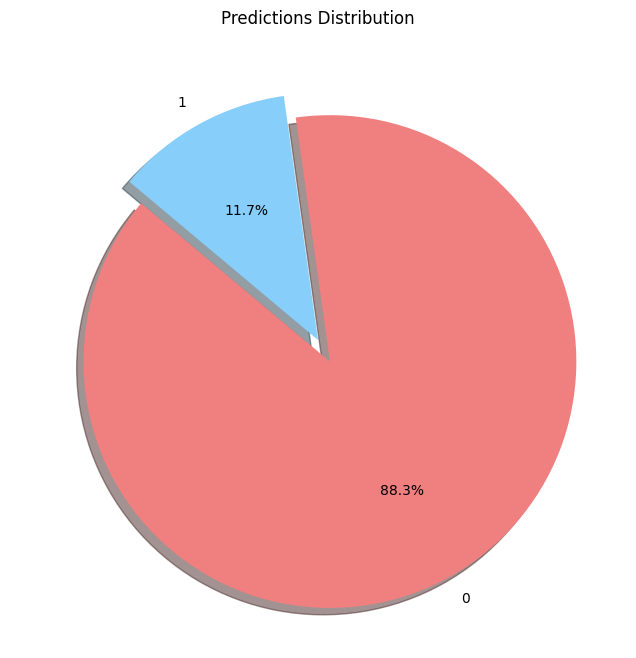

R² score: 0.5057106703953318
ROC AUC score: 0.8416286377939454
Confusion Matrix:
[[19749   425]
 [  971  2313]]
Epoch 1/25
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1881 - val_loss: 0.1697
Epoch 2/25
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1467 - val_loss: 0.1600
Epoch 3/25
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1333 - val_loss: 0.1501
Epoch 4/25
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1201 - val_loss: 0.1425
Epoch 5/25
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1066 - val_loss: 0.1251
Epoch 6/25
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1061 - val_loss: 0.1250
Epoch 7/25
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0863 - val_loss: 0.1079
Epoch 8/25
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0787 - val_loss: 0.1146
Epoch 9/25
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0682 - val_loss: 0.0969
Epoch 10/25
587/587 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0678 - val_loss: 0.0849
Epoch 11/25
587/587 ━━━━━━━

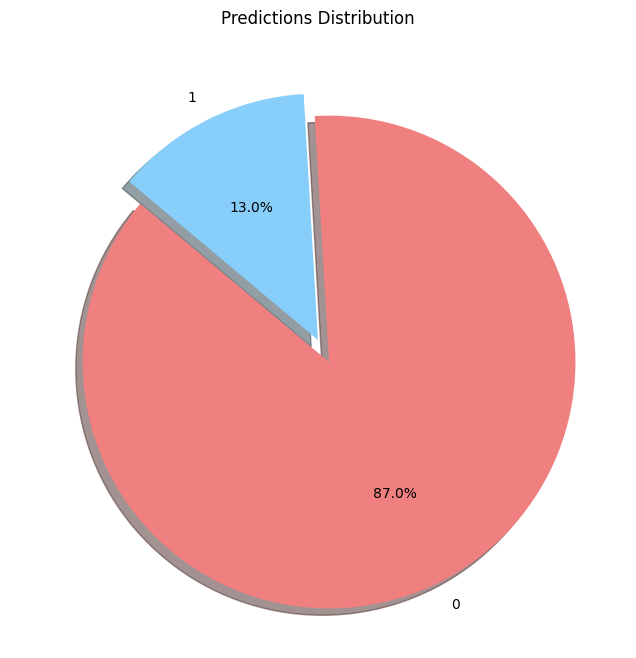

In [207]:
### 87 at 5 epochs

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split

class AutoencoderModel:
    def __init__(self, input_dim, encoding_dim=256):
        self.input_dim = input_dim
        self.encoding_dim = encoding_dim
        self.autoencoder = self.build_model()

    def build_model(self):
        # Encoder
        input_layer = Input(shape=(self.input_dim,))
        encoded = Dense(self.encoding_dim, activation='relu')(input_layer)
        encoded = Dense(self.encoding_dim // 2, activation='relu')(encoded)
        encoded = Dense(self.encoding_dim // 4, activation='relu')(encoded)
        encoded = Dense(self.encoding_dim // 8, activation='relu')(encoded)

        # Decoder
        decoded = Dense(self.encoding_dim // 8, activation='relu')(encoded)
        decoded = Dense(self.encoding_dim // 4, activation='relu')(encoded)
        decoded = Dense(self.encoding_dim // 2, activation='relu')(decoded)
        decoded = Dense(1, activation='sigmoid')(decoded)

        # Autoencoder
        autoencoder = Model(input_layer, decoded)

        # Compile the model with Binary Crossentropy loss
        autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

        return autoencoder

    def train(self, X_train, y_train, epochs=25, batch_size=32, validation_split=0.2):
        self.autoencoder.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

    def predict(self, X_test):
        return self.autoencoder.predict(X_test)

    def summary(self):
        self.autoencoder.summary()# Load the train.csv file


# Load the train.csv file
train = pd.read_csv('train.csv')
print(train.head())

# Assuming X_train, y_train, X_test, y_test, and ids_test are defined elsewhere in the code
# Initialize and train the autoencoder model
input_dim = X_train.shape[1]
autoencoder_model = AutoencoderModel(input_dim)
autoencoder_model.summary()
autoencoder_model.train(X_train, y_train)

# Predict the values using the autoencoder
y_pred = autoencoder_model.predict(X_test)

# Apply threshold of 0.5 to get binary predictions
y_pred_binary = (y_pred > 0.5).astype(int).flatten()

# Check the lengths of ids_test and y_pred_binary
print(f'Length of ids_test: {len(ids_test)}')
print(f'Length of y_pred_binary: {len(y_pred_binary)}')

# Ensure the lengths match
if len(ids_test) == len(y_pred_binary):
    # Combine IDs and predictions into a DataFrame
    predictions_df = pd.DataFrame({'id': ids_test, 'prediction': y_pred_binary})

    # Print the DataFrame
    # print(predictions_df)
    # Count the number of predictions greater than 0.5 and less than or equal to 0.5
    count_greater_than_0_5 = (y_pred_binary > 0.5).sum()
    count_less_than_or_equal_0_5 = (y_pred_binary <= 0.5).sum()

    # Print the counts
    # print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
    # print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

    # Plot a pie chart showing the percentages
    labels = ['0', '1']
    sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
    colors = ['lightcoral', 'lightskyblue']
    explode = (0.1, 0)  # explode the first slice

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.title('Predictions Distribution')
    plt.show()

    # Save the predictions to CSV with (id, prediction)
    predictions_df.to_csv('autobig.csv', index=False)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred_binary)
    print(f'R² score: {r2}')

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y_test, y_pred_binary)
    print(f'ROC AUC score: {roc_auc}')

    # Calculate and print the confusion matrix
    cm = confusion_matrix(y_test, y_pred_binary)
    print('Confusion Matrix:')
    print(cm)
else:
    print("Error: Lengths of ids_test and y_pred_binary do not match.")

# Load the test.csv file
autoencoder_model.train(X_test, y_test)
test = pd.read_csv('test.csv')
print(test.head())

# Define the features (assuming features is already defined)
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
            'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Predict the values using autoencoder_model
y_pred = autoencoder_model.predict(X)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)
print(y_pred.shape, y_pred.flatten().shape)

# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'prediction': y_pred.flatten()})

# Print the DataFrame
print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

# Print the counts
print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

# Plot a pie chart showing the percentages
labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

# Save the predictions to CSV with (id, prediction)
predictions_df.to_csv('autoxxx.csv', index=False)

In [208]:
# # Print the shapes of the datasets
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')
# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')

# # Print the first few rows of y_test and y_train without indices
# print('y_test values:')
# print(y_test.values[:5])

# print('y_train values:')
# print(y_train.values[:5])

In [209]:
class CustomModel:
    def __init__(self, layer_sizes):
        self.model = tf.keras.Sequential()
        self.model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
        
        for units in reversed(sorted(layer_sizes)):
            self.model.add(tf.keras.layers.Dense(units, activation='relu'))
        
        self.model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    def fit(self, X_train, y_train, X_test, y_test, epochs=30,verbose=0,batch_size=32):
        self.model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=verbose,batch_size=batch_size)
    
    def evaluate(self, X_test, y_test):
        return self.model.evaluate(X_test, y_test, verbose=0)
    
    def predict(self, X_test):
        y_pred_prob = self.model.predict(X_test)
        return (y_pred_prob > 0.5).astype(int)
    
    def summary(self):
        self.model.summary()

In [210]:
import itertools
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import roc_auc_score, r2_score
import gc
# Assuming CustomModel class and other necessary code is already defined

array = [256, 128, 64, 32, 16, 8, 4]

# batch_sizes = [16, 32, 64]
# epoch_values = [1, 5, 10]
batch_sizes = [32] 
epoch_values = [5]
# Generate the power set of the array
# power_set = list(itertools.chain.from_iterable(itertools.combinations(array, r) for r in range(1, len(array) + 1)))
# power_set = [[512,256, 128, 64, 32, 16, 8, 4],[512,256, 128, 64, 32, 16, 8],
#              [512,256, 128, 64, 32, 16],[512,256, 128, 64, 32],[512,256, 128, 64],
#              [512,256, 128],[512,256],[512]]
power_set = [[4,3,2]]
# Initialize variables to keep track of the best model
best_model = None
best_roc_auc = 0

# Loop to add layers, batch sizes, and epochs, and evaluate the model
for subset in power_set:
    for batch_size in batch_sizes:
        for epochs in epoch_values:
            custom_model = CustomModel(subset)
            
            # Train the model
            custom_model.fit(X_train, y_train, X_test, y_test, epochs=epochs, batch_size=batch_size)
            
            # Evaluate the model
            loss, accuracy = custom_model.evaluate(X_test, y_test)
            
            # Predict probabilities for the test set
            y_pred = custom_model.predict(X_test)
            
            # Calculate the ROC AUC score
            roc_auc = roc_auc_score(y_test, y_pred)
            
            # Calculate the R² score
            r2 = r2_score(y_test, y_pred)
            
            # Print the metrics
            print(f'Layers: {subset}, Batch Size: {batch_size}, Epochs: {epochs}')
            print(f'  Loss: {loss}')
            print(f'  Accuracy: {accuracy}')
            print(f'  ROC AUC: {roc_auc}')
            print(f'  R² score: {r2}')
            
            # Check if this model is the best so far
            if roc_auc > best_roc_auc:
                best_roc_auc = roc_auc
                best_model = custom_model
                custom_model.model.save("bm.keras")
            gc.collect()

# Print the best model summary
print("Best Model Summary:")
best_model.summary()

C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 842us/step
Layers: [4, 3, 2], Batch Size: 32, Epochs: 5
  Loss: 0.19208072125911713
  Accuracy: 0.9409157037734985
  ROC AUC: 0.8365227846601798
  R² score: 0.5092514249053939
Best Model Summary:


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_494 (Dense)               │ (None, 4)              │           108 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_495 (Dense)               │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_496 (Dense)               │ (None, 2)              │             8 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_497 (Dense)               │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404 (1.58 KB)

 Trainable params: 134 (536.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 270 (1.06 KB)

734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Number of predictions equal to 0: 20945
Number of predictions equal to 1: 2513


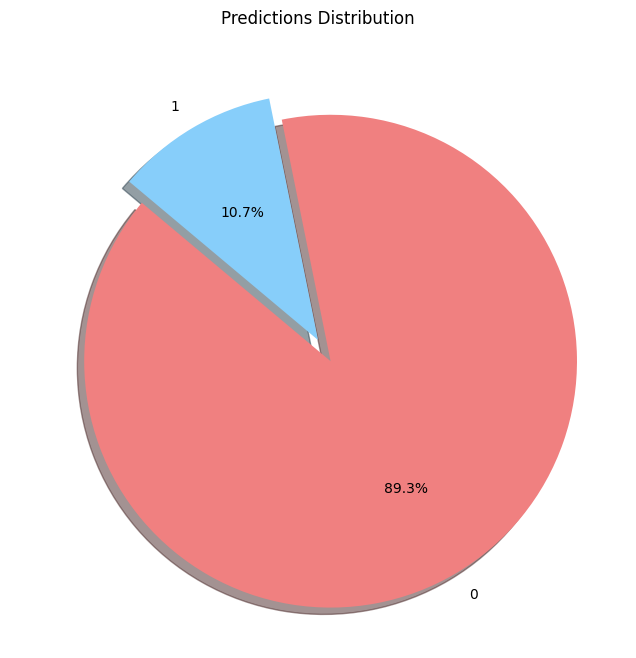

In [211]:


# Predict the values using the best model
best_model.fit( X_test, y_test,X_train, y_train)
y_pred = best_model.predict(X_test)
print(y_pred)

# Count the number of predictions that are 0 and 1
count_0 = (y_pred == 0).sum()
count_1 = (y_pred == 1).sum()

# Print the counts
print(f'Number of predictions equal to 0: {count_0}')
print(f'Number of predictions equal to 1: {count_1}')

# Create a pie chart
labels = ['0', '1']
sizes = [count_0, count_1]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

Confusion Matrix:
[[19906   268]
 [ 1039  2245]]


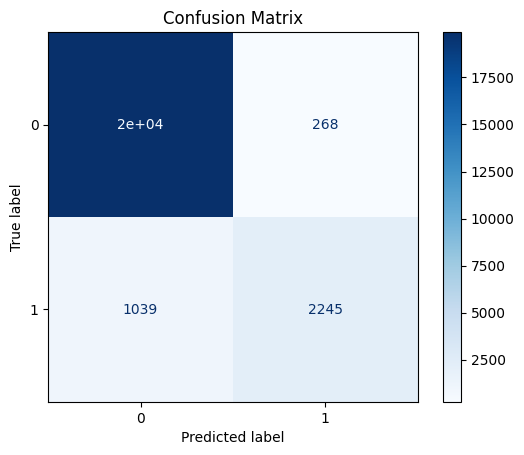

R² score: 0.5372233855348844
Best ROC AUC score: 0.8365227846601798


In [212]:
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Calculate and print the R² score
r2 = r2_score(y_test, y_pred)
print(f'R² score: {r2}')

# Print the best ROC AUC score
print(f'Best ROC AUC score: {best_roc_auc}')

In [213]:
#load model from bm.keras and predict and find r2 rocaucscore and confusion matrix for x_test and y_test

import tensorflow as tf
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix
import pandas as pd

# Load the model from bm.keras
model = tf.keras.models.load_model('bm.keras')

# Predict on the test data
y_pred_prob = model.predict(X_test)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'R² Score: {r2}')
print(f'ROC AUC Score: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)

734/734 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step
R² Score: 0.5092514249053939
ROC AUC Score: 0.9271483420067581
Confusion Matrix:
[[19801   373]
 [ 1013  2271]]


In [214]:
#92 t 10
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape

# Reshape the data
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 1), activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 1)),  # First max pooling layer
    Dropout(0.25),  # First dropout layer
    Conv2D(64, (3, 1), activation='relu'),  # Second convolutional layer
    MaxPooling2D(pool_size=(2, 1)),  # Second max pooling layer
    Dropout(0.25),  # Second dropout layer
    Conv2D(128, (3, 1), activation='relu'),  # Third convolutional layer
    MaxPooling2D(pool_size=(2, 1)),  # Third max pooling layer
    Dropout(0.25),  # Third dropout layer
    Flatten(),  # Flatten the data for the dense layers
    Dense(256, activation='relu'),  # First dense layer
    Dropout(0.5),  # Fourth dropout layer
    Dense(128, activation='relu'),  # Second dense layer
    Dropout(0.5),  # Fifth dropout layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()
# Train the model
model.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')
#r2 and roc_auc

# Predict probabilities for the test set
y_pred_prob = model.predict(X_test_reshaped)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate R² score
r2 = r2_score(y_test, y_pred)
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
# Print the results
print(f'R² Score: {r2}')
print(f'ROC AUC Score: {roc_auc}')

C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)              │ (None, 24, 1, 32)      │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 12, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_68 (Dropout)            │ (None, 12, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 10, 1, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 5, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_69 (Dropout)            │ (None, 5, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_64 (Conv2D)              │ (None, 3, 1, 128)      │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_70 (Dropout)            │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_22 (Flatten)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_498 (Dense)               │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_71 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_499 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_72 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_500 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,089 (379.25 KB)

 Trainable params: 97,089 (379.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8963 - loss: 0.2896 - val_accuracy: 0.9354 - val_loss: 0.1979
Epoch 2/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9272 - loss: 0.2248 - val_accuracy: 0.9422 - val_loss: 0.1916
Epoch 3/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9292 - loss: 0.2166 - val_accuracy: 0.9416 - val_loss: 0.1930
Epoch 4/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9334 - loss: 0.2096 - val_accuracy: 0.9436 - val_loss: 0.1866
Epoch 5/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9359 - loss: 0.2046 - val_accuracy: 0.9442 - val_loss: 0.1894
Epoch 6/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9369 - loss: 0.2046 - val_accuracy: 0.9456 - val_loss: 0.1864
Epoch 7/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9392 - loss: 0.2008 - val_accuracy: 0.9454 - val_loss: 0.1849
Epoch 8/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9381 - loss: 0

C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)              │ (None, 24, 1, 128)     │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_31            │ (None, 12, 1, 128)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_73 (Dropout)            │ (None, 12, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_66 (Conv2D)              │ (None, 10, 1, 64)      │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_32            │ (None, 5, 1, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_74 (Dropout)            │ (None, 5, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_67 (Conv2D)              │ (None, 3, 1, 32)       │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_33            │ (None, 1, 1, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_75 (Dropout)            │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_501 (Dense)               │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_76 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_502 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_77 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_503 (Dense)               │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 72,801 (284.38 KB)

 Trainable params: 72,801 (284.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8957 - loss: 0.2901 - val_accuracy: 0.9323 - val_loss: 0.2046
Epoch 2/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9289 - loss: 0.2216 - val_accuracy: 0.9375 - val_loss: 0.1972
Epoch 3/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9322 - loss: 0.2127 - val_accuracy: 0.9374 - val_loss: 0.1975
Epoch 4/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9336 - loss: 0.2096 - val_accuracy: 0.9393 - val_loss: 0.1924
Epoch 5/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9361 - loss: 0.2058 - val_accuracy: 0.9436 - val_loss: 0.1860
Epoch 6/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9384 - loss: 0.2005 - val_accuracy: 0.9452 - val_loss: 0.1838
Epoch 7/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9396 - loss: 0.1971 - val_accuracy: 0.9450 - val_loss: 0.1843
Epoch 8/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9413 - loss: 0

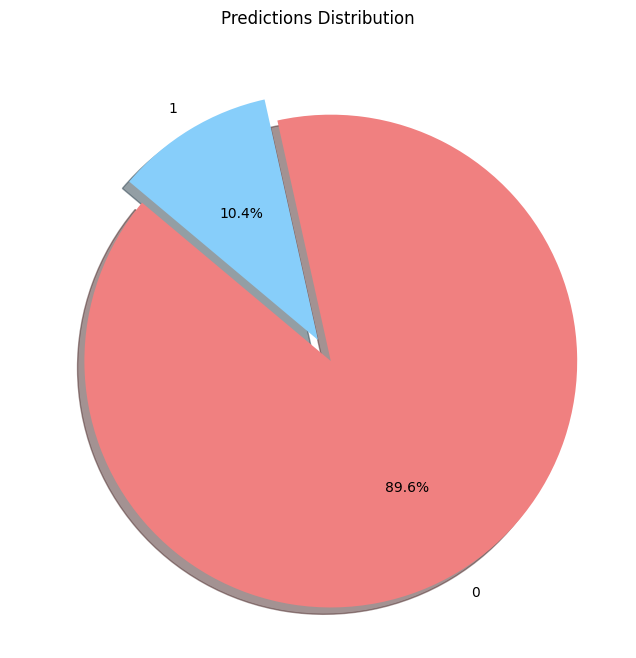

In [215]:
#91 t 1 epoch
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape ,AvgPool2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix

# Reshape the data
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))

# Define the CNN model
convmodel2 = Sequential([
    Conv2D(128, (3, 1), activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)),  # First convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # First max pooling layer
    Dropout(0.25),  # First dropout layer
    Conv2D(64, (3, 1), activation='relu'),  # Second convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # Second max pooling layer
    Dropout(0.25),  # Second dropout layer
    Conv2D(32, (3, 1), activation='relu'),  # Third convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # Third max pooling layer
    Dropout(0.25),  # Third dropout layer
    Flatten(),  # Flatten the data for the dense layers
    Dense(256, activation='relu'),  # First dense layer
    Dropout(0.5),  # Fourth dropout layer
    Dense(128, activation='relu'),  # Second dense layer
    Dropout(0.5),  # Fifth dropout layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
convmodel2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
convmodel2.summary()

# Train the model
convmodel2.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
loss, accuracy = convmodel2.evaluate(X_test_reshaped, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Predict probabilities for the test set
y_pred_prob = convmodel2.predict(X_test_reshaped)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'R² Score: {r2}')
print(f'ROC AUC Score: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix

# Load the test.csv file
test = pd.read_csv('test.csv')
print(test.head())

# Define the features (assuming features is already defined)
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
            'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Predict the values using convmodel2
y_pred = convmodel2.predict(X.reshape((X.shape[0], X.shape[1], 1, 1)))

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)
print(y_pred.shape, y_pred.flatten().shape)

# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'prediction': y_pred.flatten()})

# Print the DataFrame
print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

# Print the counts
print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

# Plot a pie chart showing the percentages
labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

# Save the predictions to CSV with (id, prediction)
predictions_df.to_csv('convmid.csv', index=False)



C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_68 (Conv2D)              │ (None, 24, 1, 128)     │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_34            │ (None, 12, 1, 128)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_78 (Dropout)            │ (None, 12, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_69 (Conv2D)              │ (None, 10, 1, 64)      │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_35            │ (None, 5, 1, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_79 (Dropout)            │ (None, 5, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_70 (Conv2D)              │ (None, 3, 1, 32)       │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_36            │ (None, 1, 1, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_80 (Dropout)            │ (None, 1, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_24 (Flatten)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_504 (Dense)               │ (None, 256)            │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_81 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_505 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_82 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ (None, 16, 1, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_22 (UpSampling2D) │ (None, 32, 1, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_71 (Conv2D)              │ (None, 30, 1, 32)      │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_23 (UpSampling2D) │ (None, 60, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (None, 58, 1, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_24 (UpSampling2D) │ (None, 116, 1, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (None, 114, 1, 128)    │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_25 (Flatten)            │ (None, 14592)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_506 (Dense)               │ (None, 1)              │        14,593 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 118,977 (464.75 KB)

 Trainable params: 118,977 (464.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 34s 11ms/step - accuracy: 0.8946 - loss: 0.2921 - val_accuracy: 0.9192 - val_loss: 0.2594
Epoch 2/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 32s 11ms/step - accuracy: 0.9273 - loss: 0.2235 - val_accuracy: 0.9419 - val_loss: 0.1936
Epoch 3/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 31s 11ms/step - accuracy: 0.9323 - loss: 0.2118 - val_accuracy: 0.9443 - val_loss: 0.1943
Epoch 4/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9354 - loss: 0.2059 - val_accuracy: 0.9452 - val_loss: 0.1833
Epoch 5/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.9363 - loss: 0.2046 - val_accuracy: 0.9448 - val_loss: 0.1962
Epoch 6/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 37s 13ms/step - accuracy: 0.9371 - loss: 0.2006 - val_accuracy: 0.9454 - val_loss: 0.1886
Epoch 7/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 34s 12ms/step - accuracy: 0.9398 - loss: 0.1978 - val_accuracy: 0.9405 - val_loss: 0.1922
Epoch 8/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 36s 12ms/step - accuracy: 0.9388 -

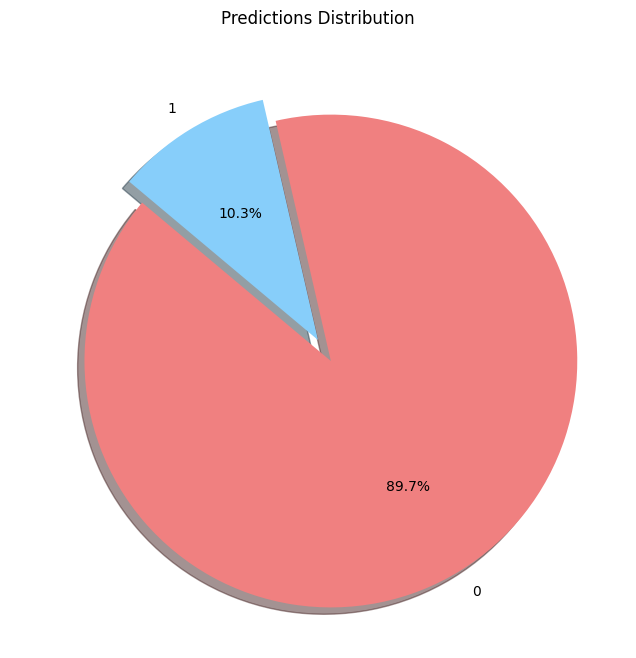

In [216]:
#91 at 1 epco
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout, Reshape, AvgPool2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix

# Reshape the data
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))

# Define the encoder-decoder model
encoder_decoder_model = Sequential([
    # Encoder
    Conv2D(128, (3, 1), activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)),  # First convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # First average pooling layer
    Dropout(0.25),  # First dropout layer
    Conv2D(64, (3, 1), activation='relu'),  # Second convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # Second average pooling layer
    Dropout(0.25),  # Second dropout layer
    Conv2D(32, (3, 1), activation='relu'),  # Third convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # Third average pooling layer
    Dropout(0.25),  # Third dropout layer
    Flatten(),  # Flatten the data for the dense layers
    Dense(256, activation='relu'),  # First dense layer
    Dropout(0.5),  # Fourth dropout layer
    Dense(128, activation='relu'),  # Second dense layer
    Dropout(0.5),  # Fifth dropout layer
    
    # Decoder
    Reshape((16, 1, 8)),  # Reshape to match the input shape of the decoder
    UpSampling2D(size=(2, 1)),  # First upsampling layer
    Conv2D(32, (3, 1), activation='relu'),  # First convolutional layer in decoder
    UpSampling2D(size=(2, 1)),  # Second upsampling layer
    Conv2D(64, (3, 1), activation='relu'),  # Second convolutional layer in decoder
    UpSampling2D(size=(2, 1)),  # Third upsampling layer
    Conv2D(128, (3, 1), activation='relu'),  # Third convolutional layer in decoder
    Flatten(),  # Flatten the data for the final dense layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
encoder_decoder_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
encoder_decoder_model.summary()

# Train the model
encoder_decoder_model.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
loss, accuracy = encoder_decoder_model.evaluate(X_test_reshaped, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Predict probabilities for the test set
y_pred_prob = encoder_decoder_model.predict(X_test_reshaped)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'R² Score: {r2}')
print(f'ROC AUC Score: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)

# Load the test.csv file
test = pd.read_csv('test.csv')
print(test.head())

# Define the features (assuming features is already defined)
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
            'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Predict the values using encoder_decoder_model
y_pred = encoder_decoder_model.predict(X.reshape((X.shape[0], X.shape[1], 1, 1)))

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)
print(y_pred.shape, y_pred.flatten().shape)

# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'prediction': y_pred.flatten()})

# Print the DataFrame
print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

# Print the counts
print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

# Plot a pie chart showing the percentages
labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

# Save the predictions to CSV with (id, prediction)
predictions_df.to_csv('encodermid.csv', index=False)

C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_74 (Conv2D)              │ (None, 24, 1, 256)     │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_37            │ (None, 12, 1, 256)     │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_83 (Dropout)            │ (None, 12, 1, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 10, 1, 128)     │        98,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_38            │ (None, 5, 1, 128)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_84 (Dropout)            │ (None, 5, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_76 (Conv2D)              │ (None, 3, 1, 64)       │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_39            │ (None, 1, 1, 64)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_85 (Dropout)            │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_26 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_507 (Dense)               │ (None, 512)            │        33,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_86 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_508 (Dense)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_87 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ (None, 8, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_25 (UpSampling2D) │ (None, 16, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_77 (Conv2D)              │ (None, 14, 1, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_26 (UpSampling2D) │ (None, 28, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_78 (Conv2D)              │ (None, 26, 1, 128)     │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_27 (UpSampling2D) │ (None, 52, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_79 (Conv2D)              │ (None, 50, 1, 256)     │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_27 (Flatten)            │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_509 (Dense)               │ (None, 1)              │        12,801 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 430,977 (1.64 MB)

 Trainable params: 430,977 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 37s 12ms/step - accuracy: 0.9035 - loss: 0.2777 - val_accuracy: 0.9355 - val_loss: 0.2101
Epoch 2/30
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 35s 12ms/step - accuracy: 0.9314 - loss: 0.2133 - val_accuracy: 0.9383 - val_loss: 0.2023
Epoch 3/30
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9345 - loss: 0.2088 - val_accuracy: 0.9438 - val_loss: 0.1927
Epoch 4/30
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9381 - loss: 0.2010 - val_accuracy: 0.9419 - val_loss: 0.1975
Epoch 5/30
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9377 - loss: 0.2023 - val_accuracy: 0.9417 - val_loss: 0.1867
Epoch 6/30
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9388 - loss: 0.1994 - val_accuracy: 0.9447 - val_loss: 0.1855
Epoch 7/30
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 30s 10ms/step - accuracy: 0.9391 - loss: 0.1956 - val_accuracy: 0.9428 - val_loss: 0.1922
Epoch 8/30
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.9410 -

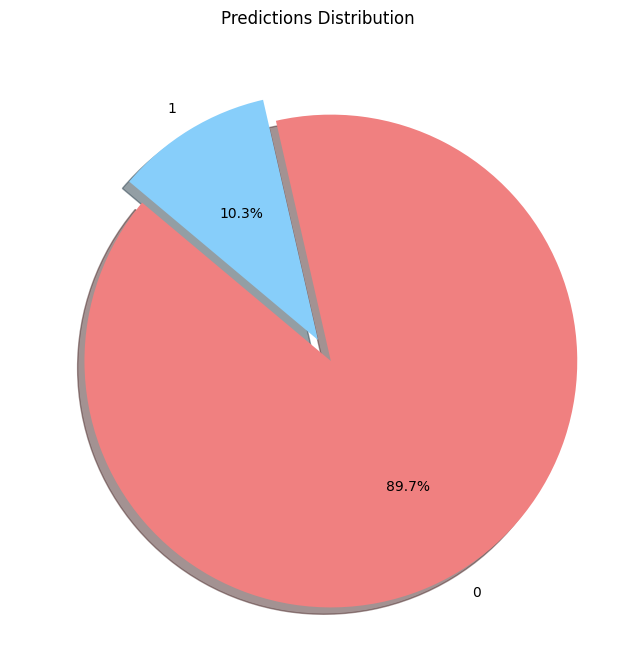

In [217]:
#91 at 1 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout, Reshape, AvgPool2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix

# Reshape the data
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))

# Define the encoder-decoder model
encoder_decoder_model = Sequential([
    # Encoder
    Conv2D(256, (3, 1), activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)),  # First convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # First average pooling layer
    Dropout(0.25),  # First dropout layer
    Conv2D(128, (3, 1), activation='relu'),  # Second convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # Second average pooling layer
    Dropout(0.25),  # Second dropout layer
    Conv2D(64, (3, 1), activation='relu'),  # Third convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # Third average pooling layer
    Dropout(0.25),  # Third dropout layer
    Flatten(),  # Flatten the data for the dense layers
    Dense(512, activation='relu'),  # First dense layer
    Dropout(0.5),  # Fourth dropout layer
    Dense(256, activation='relu'),  # Second dense layer
    Dropout(0.5),  # Fifth dropout layer
    
    # Decoder
    Reshape((8, 1, 32)),  # Reshape to match the input shape of the decoder
    UpSampling2D(size=(2, 1)),  # First upsampling layer
    Conv2D(64, (3, 1), activation='relu'),  # First convolutional layer in decoder
    UpSampling2D(size=(2, 1)),  # Second upsampling layer
    Conv2D(128, (3, 1), activation='relu'),  # Second convolutional layer in decoder
    UpSampling2D(size=(2, 1)),  # Third upsampling layer
    Conv2D(256, (3, 1), activation='relu'),  # Third convolutional layer in decoder
    Flatten(),  # Flatten the data for the final dense layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
encoder_decoder_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
encoder_decoder_model.summary()

# Train the model
encoder_decoder_model.fit(X_train_reshaped, y_train, epochs=30, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
loss, accuracy = encoder_decoder_model.evaluate(X_test_reshaped, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Predict probabilities for the test set
y_pred_prob = encoder_decoder_model.predict(X_test_reshaped)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'R² Score: {r2}')
print(f'ROC AUC Score: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)

# Load the test.csv file
test = pd.read_csv('test.csv')
print(test.head())

# Define the features (assuming features is already defined)
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
            'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Predict the values using encoder_decoder_model
y_pred = encoder_decoder_model.predict(X.reshape((X.shape[0], X.shape[1], 1, 1)))

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)
print(y_pred.shape, y_pred.flatten().shape)
# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'prediction': y_pred.flatten()})

# Print the DataFrame
print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

# Save the predictions to CSV with (id, prediction)
predictions_df.to_csv('encodermax.csv', index=False)

C:\Users\death\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_80 (Conv2D)              │ (None, 24, 1, 64)      │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_40            │ (None, 12, 1, 64)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_88 (Dropout)            │ (None, 12, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_81 (Conv2D)              │ (None, 10, 1, 32)      │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_41            │ (None, 5, 1, 32)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_89 (Dropout)            │ (None, 5, 1, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_28 (Flatten)            │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_510 (Dense)               │ (None, 128)            │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_90 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_511 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_91 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_10 (Reshape)            │ (None, 8, 1, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_28 (UpSampling2D) │ (None, 16, 1, 8)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_82 (Conv2D)              │ (None, 14, 1, 32)      │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_29 (UpSampling2D) │ (None, 28, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_83 (Conv2D)              │ (None, 26, 1, 64)      │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 1664)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_512 (Dense)               │ (None, 1)              │         1,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,969 (171.75 KB)

 Trainable params: 43,969 (171.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8842 - loss: 0.2965 - val_accuracy: 0.9298 - val_loss: 0.2565
Epoch 2/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9265 - loss: 0.2194 - val_accuracy: 0.9382 - val_loss: 0.2291
Epoch 3/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9312 - loss: 0.2121 - val_accuracy: 0.9352 - val_loss: 0.2111
Epoch 4/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9353 - loss: 0.2051 - val_accuracy: 0.9452 - val_loss: 0.1899
Epoch 5/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9351 - loss: 0.2052 - val_accuracy: 0.9454 - val_loss: 0.1824
Epoch 6/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9370 - loss: 0.2009 - val_accuracy: 0.9465 - val_loss: 0.1871
Epoch 7/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9402 - loss: 0.1932 - val_accuracy: 0.9462 - val_loss: 0.1811
Epoch 8/25
2933/2933 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9408 - loss: 0

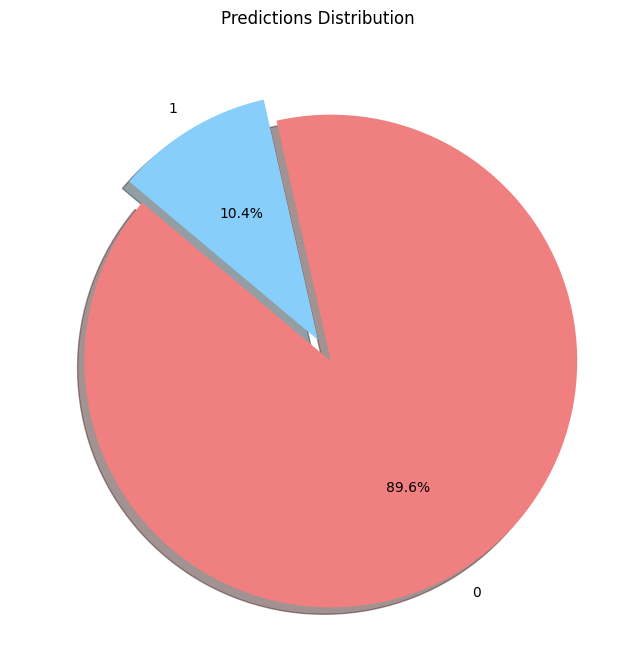

In [218]:
#92 at 10 epochs
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout, Reshape, AvgPool2D
from tensorflow.keras.models import Sequential
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix

# Reshape the data
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], 1, 1))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1, 1))

# Define the smaller encoder-decoder model
encoder_decoder_model = Sequential([
    # Encoder
    Conv2D(64, (3, 1), activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2], 1)),  # First convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # First average pooling layer
    Dropout(0.25),  # First dropout layer
    Conv2D(32, (3, 1), activation='relu'),  # Second convolutional layer
    AvgPool2D(pool_size=(2, 1)),  # Second average pooling layer
    Dropout(0.25),  # Second dropout layer
    Flatten(),  # Flatten the data for the dense layers
    Dense(128, activation='relu'),  # First dense layer
    Dropout(0.5),  # Third dropout layer
    Dense(64, activation='relu'),  # Second dense layer
    Dropout(0.5),  # Fourth dropout layer
    
    # Decoder
    Reshape((8, 1, 8)),  # Reshape to match the input shape of the decoder
    UpSampling2D(size=(2, 1)),  # First upsampling layer
    Conv2D(32, (3, 1), activation='relu'),  # First convolutional layer in decoder
    UpSampling2D(size=(2, 1)),  # Second upsampling layer
    Conv2D(64, (3, 1), activation='relu'),  # Second convolutional layer in decoder
    Flatten(),  # Flatten the data for the final dense layer
    Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
encoder_decoder_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
encoder_decoder_model.summary()

# Train the model
encoder_decoder_model.fit(X_train_reshaped, y_train, epochs=25, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Evaluate the model
loss, accuracy = encoder_decoder_model.evaluate(X_test_reshaped, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Predict probabilities for the test set
y_pred_prob = encoder_decoder_model.predict(X_test_reshaped)

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate R² score
r2 = r2_score(y_test, y_pred)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print(f'R² Score: {r2}')
print(f'ROC AUC Score: {roc_auc}')
print('Confusion Matrix:')
print(conf_matrix)

# Load the test.csv file
test = pd.read_csv('test.csv')
print(test.head())

# Define the features (assuming features is already defined)
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
            'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Predict the values using encoder_decoder_model
y_pred = encoder_decoder_model.predict(X.reshape((X.shape[0], X.shape[1], 1, 1)))

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)
print(y_pred.shape, y_pred.flatten().shape)

# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'prediction': y_pred.flatten()})

# Print the DataFrame
print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

# Print the counts
print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

# Plot a pie chart showing the percentages
labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

# Save the predictions to CSV with (id, prediction)
predictions_df.to_csv('encodermin.csv', index=False)

      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   
3  58648          33          50000                  RENT                4.0   
4  58649          26         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.36                         N                         

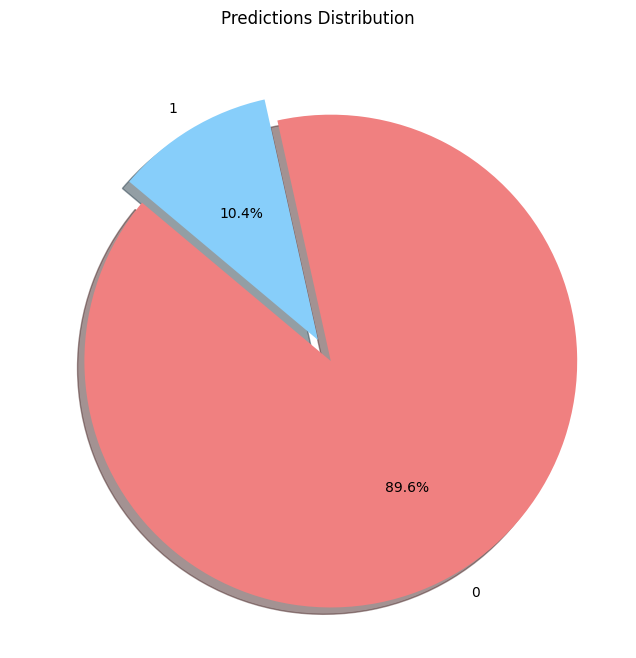

In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix

# Load the test.csv file
test = pd.read_csv('test.csv')
print(test.head())

# Define the features (assuming features is already defined)
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
            'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Predict the values using convmodel2
y_pred = convmodel2.predict(X.reshape((X.shape[0], X.shape[1], 1, 1)))

# Apply threshold of 0.5 to get binary predictions
y_pred = (y_pred > 0.5).astype(int)
print(y_pred.shape, y_pred.flatten().shape)

# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'prediction': y_pred.flatten()})

# Print the DataFrame
print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

# Print the counts
print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

# Plot a pie chart showing the percentages
labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()

# Save the predictions to CSV with (id, prediction)
predictions_df.to_csv('conv3.csv', index=False)

      id  person_age  person_income person_home_ownership  person_emp_length  \
0  58645          23          69000                  RENT                3.0   
1  58646          26          96000              MORTGAGE                6.0   
2  58647          26          30000                  RENT                5.0   
3  58648          33          50000                  RENT                4.0   
4  58649          26         102000              MORTGAGE                8.0   

         loan_intent loan_grade  loan_amnt  loan_int_rate  \
0    HOMEIMPROVEMENT          F      25000          15.76   
1           PERSONAL          C      10000          12.68   
2            VENTURE          E       4000          17.19   
3  DEBTCONSOLIDATION          A       7000           8.90   
4    HOMEIMPROVEMENT          D      15000          16.32   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.36                         N                         

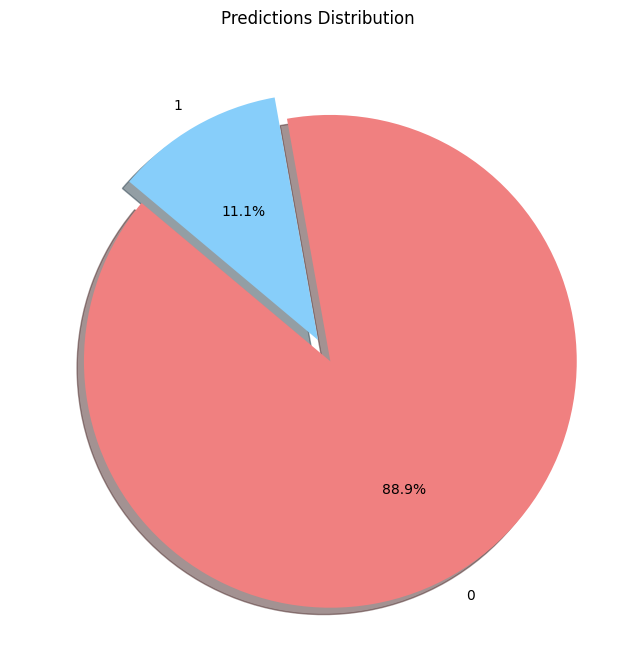

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import r2_score, roc_auc_score, confusion_matrix
import pandas as pd

model = tf.keras.models.load_model('bm.keras')
# Load the test.csv file
test = pd.read_csv('test.csv')
print(test.head())

# Define the features (assuming features is already defined)
features = ['person_age', 'person_income', 'person_home_ownership', 'person_emp_length',
            'loan_intent', 'loan_grade', 'loan_amnt', 'loan_int_rate', 'loan_percent_income',
            'cb_person_default_on_file', 'cb_person_cred_hist_length']

# Extract IDs and features
ids = test['id']  # Assuming 'id' is the column name for IDs in the test.csv file
X = test[features]

# Preprocess the data
X = preprocessor.transform(X)

# Predict the values using the model
# Clip the predictions to 0 or 1 based on the threshold of 0.5
y_pred = model.predict(X)
#apply threshold
y_pred = (y_pred > 0.5).astype(int)
print(y_pred.shape,y_pred.flatten().shape)
# Combine IDs and predictions into a DataFrame
predictions_df = pd.DataFrame({'id': ids, 'prediction': y_pred.flatten()})

# Print the DataFrame
print(predictions_df)

# Count the number of predictions greater than 0.5 and less than or equal to 0.5
count_greater_than_0_5 = (y_pred > 0.5).sum()
count_less_than_or_equal_0_5 = (y_pred <= 0.5).sum()

# Print the counts
print(f'Number of predictions greater than 0.5: {count_greater_than_0_5}')
print(f'Number of predictions less than or equal to 0.5: {count_less_than_or_equal_0_5}')

# Plot a pie chart showing the percentages
labels = ['0', '1']
sizes = [count_less_than_or_equal_0_5, count_greater_than_0_5]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the first slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Predictions Distribution')
plt.show()
#save the predictions to csv with (id,prediction)

predictions_df.to_csv('predictions.csv', index=False)